# TP2 : Analyse Spectrale
Elwan LEFEVRE, Romanin CHARDARD

## Installation des librairies

In [1]:
%pip install numpy
%pip install matplotlib
%pip install dataclasses

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Mise en place de l'environement Python3.11

In [3]:
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from dataclasses import dataclass, field
import numpy as np
from numpy.typing import NDArray

## Création des class du signal

In [10]:
# Definition des dataclasses

@dataclass
class Signal:
    # Classe représentant les caracteristique d'un signal
    f_0: float                              # Fréquence du signal
    time: float                             # Durée du signal
    f_ech: float                            # Fréquence d'échantillonage
    temps: NDArray = field(init=False)      # Liste des temps
    signal: NDArray = field(init=False)     # Liste des valeurs du signal
    
    def __post_init__(self):
        self.temps = np.arange(0, self.time, 1/self.f_ech)

    def getSpectre(self):
        N = int(4*np.ceil(self.time/(1/self.f_ech)))
        n = np.arange(N)
        nu = n*self.f_ech/N
        S = np.fft.fft(self.signal,N)
        return nu,S
    
    def getSpectreCentre(self):
        S_init = self.getSpectre()[-1]

        S = np.fft.fftshift(S_init)
        n = np.arange(len(S))
        nu = n*self.f_ech/len(S) -self.f_ech/2

        return nu,S

    def plotSpectre(self,name):
        plt.figure(3)
        plt.plot(self.temps, self.signal)
        plt.title(f'{name} en fonction du temps fe={self.f_ech}')
        plt.xlabel("Temps")
        plt.show()
        nu,S = self.getSpectreCentre()

        plt.figure(4)
        plt.plot(nu,S.real)
        plt.title(f"Spectre {name} fe={self.f_ech}")
        plt.xlabel("Hz")
        plt.show


        
@dataclass      
class Signal_Cos(Signal):
    # Classe représentant un signal cosinus
    def __post_init__(self):
        super().__post_init__()
        self.signal = np.cos(2*np.pi*self.f_0*self.temps)
        
@dataclass       
class Signal_Sin(Signal):
    # Classe représentant un signal sinus
    def __post_init__(self):
        super().__post_init__()
        self.signal = np.sin(2*np.pi*self.f_0*self.temps)   

## 1 - Analyse de signaux synthétiques

Simulation d'un signal sinusoïdal de fréquence $v_0$, de durée $T$.

$s(t) = \cos(2\pi v_0t)$

### 1.1 - Création de la séquence temporelle

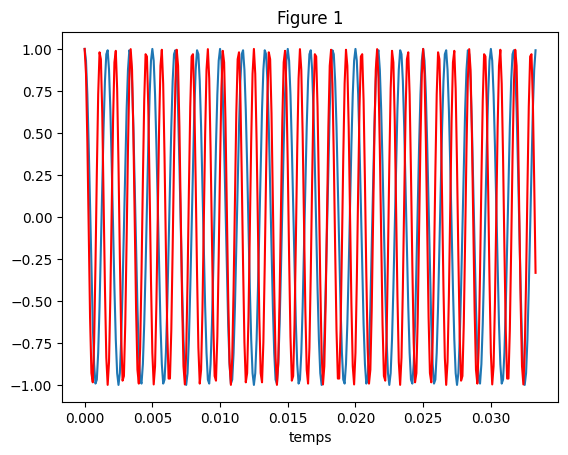

In [6]:
Te = 0.1*10**-3
v0 = 600
ve = 1/Te
T = 20/v0

s1 = Signal_Cos(v0,T,ve)
s2 = Signal_Cos(880,T,ve)

plt.figure(1)
plt.plot(s1.temps,s1.signal)
plt.plot(s2.temps,s2.signal, 'r')
plt.title("Figure 1")
plt.xlabel("temps")
plt.show()

### 1.2 - Calcul et affichage du spectre

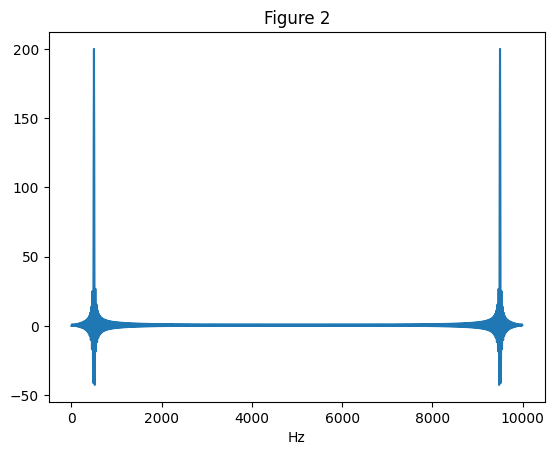

In [7]:
s3 = Signal_Cos(500,20/500,10000)
nu,S = s3.getSpectre()
plt.figure(2)
plt.plot(nu,S.real)
plt.title("Figure 2")
plt.xlabel("Hz")
plt.show()

### 1.3 - Influence de la fréquence d'échantillonnage

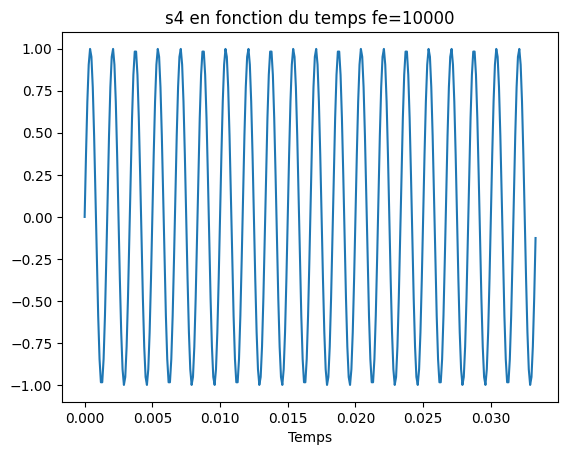

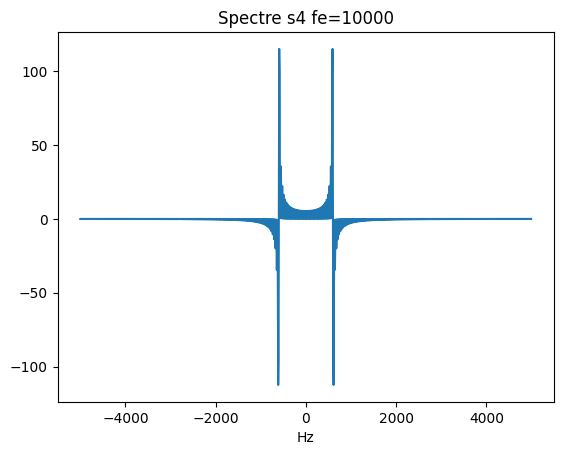

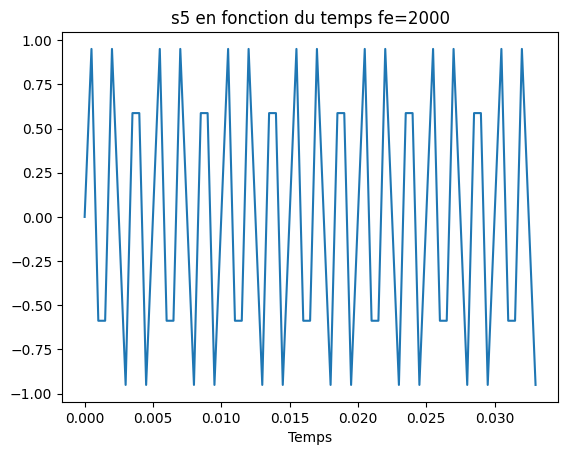

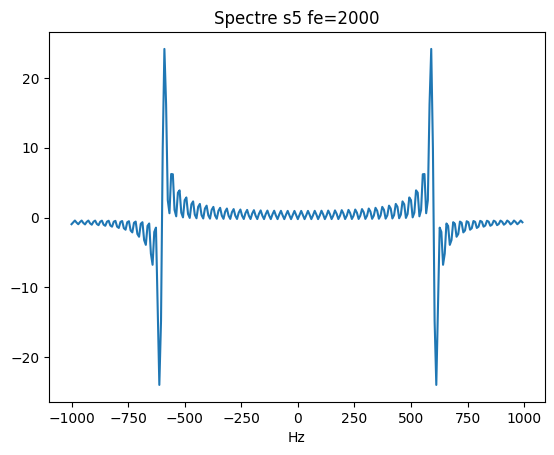

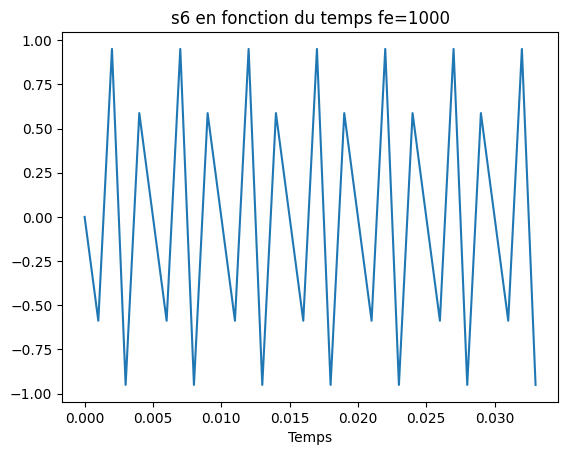

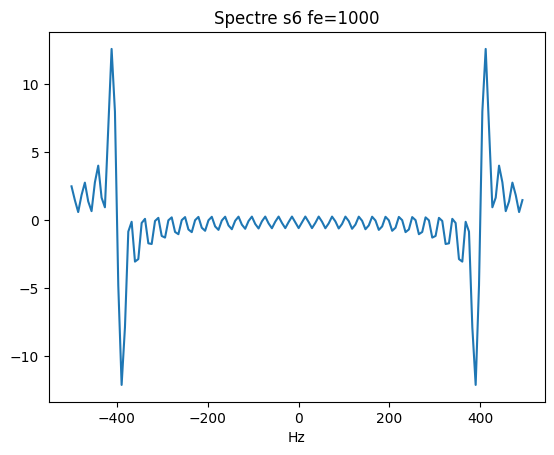

In [8]:
s4 = Signal_Sin(600,20/600,10000)
s4.plotSpectre("s4")


s5 = Signal_Sin(600,20/600,2000)
s5.plotSpectre("s5")


s6 = Signal_Sin(600,20/600,1000)
s6.plotSpectre("s6")